#Multilayer Perceptron (MLP)

In this notebook we will cover :

1. What is MLP and it's structure?
2. When should you use MLP?
3.   Optimizers
4.   Regularization
5.   What are Parameters and Hyperparameters
6.  Batch Normalization 
7. How to code above relevant topics in TensorFlow.



#Structure of MLP
Now that you are familiar with basic Perceptron, we will take a detailed look on how to train a Multilayer Perceptron.

First let's see what  makes a Neural Network to be called as Multilayer Perceptron or Deep Neural Network (DNN). It mainly depends on the number of layers or hidden layers the network has. There is no exact number to classify as DNN, usually more than two or hidden layers is considered as DNN.

###A Typical DNN Structure with multiple Layers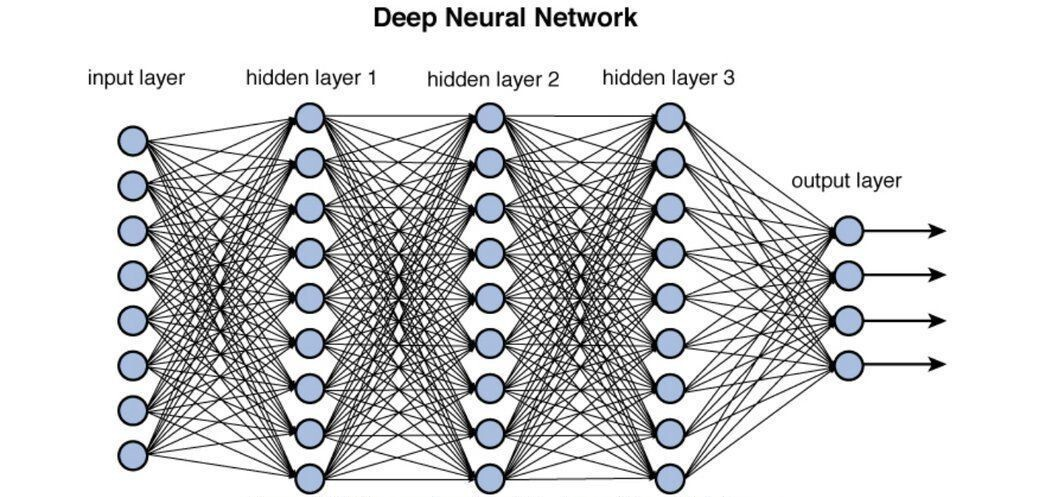<br>
Source : https://towardsdatascience.com/training-deep-neural-networks-9fdb1964b964

We can see that the DNN has three hidden layers and  *deeply* connected means, *every output of the previous layer is connected to every single neurons input* as depicted in the image.

##Let us take a look at the Tensorflow code to build the above model.


 


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([ tf.keras.layers.Dense(8, activation='relu'), #Input Layer
tf.keras.layers.Dense(9, activation='relu'), #Hidden Layer 1
tf.keras.layers.Dense(9, activation='relu'), #Hidden Layer 2
tf.keras.layers.Dense(9, activation='tanh'), #Hidden Layer 3
tf.keras.layers.Dense(4, activation='sigmoid') ]) #Output Layer



tf.keras.Sequential : Other layers get declared within this, and is executed in the order they are declared or in other words executed sequentially.

tf.keras.layers.Dense : Creates a new layer in the network, th first argument is a *int* whose value declares how many neurons to be declared in that particular layer.  The second arguement *activation* what activation function to use before outputting the tensor.

We can see that the image has eight neurons in the input layer, therefore the first Dense layer has eight as it's arguement.  The first hidden layer has nine neurons, hence nine as it's arguement and so on till output layer.


##When shoud you use MLP?

In simple datasets there will be a simpe relation between input and output, and with few dimensions (1 or 2) like the ones shown below

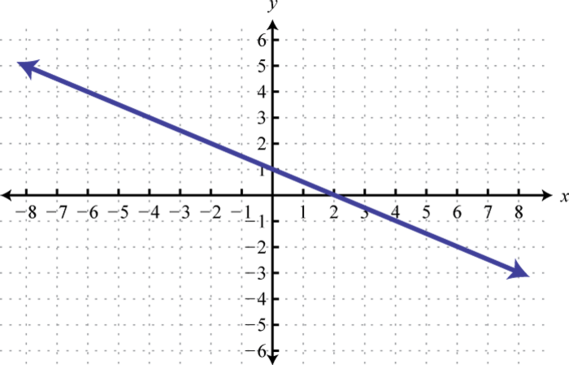

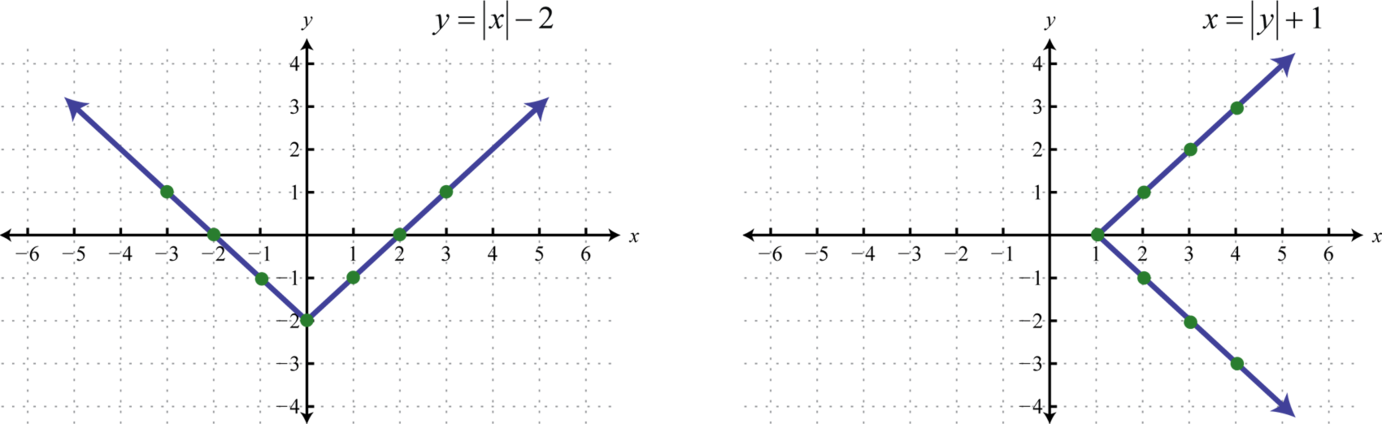

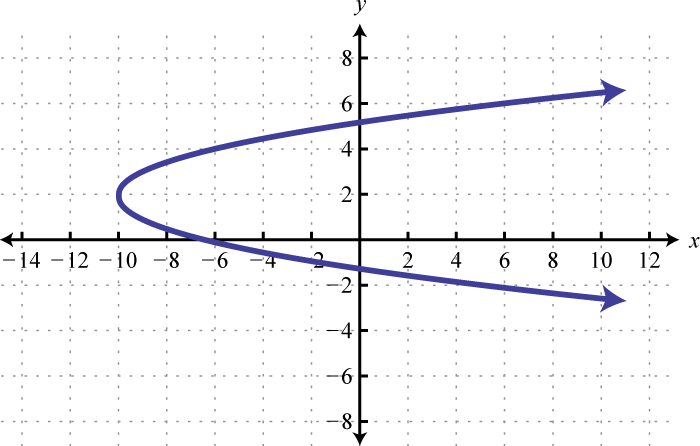

For these kinds, it is enough to use a simple Single layer Perceptron or max with 2 layers.

In real world applications, dataset is complex, that's where DNN/MLP come into picture which has more layers and more neurons so that the model can capture the complex relations across dimensions.

###Take a look the video below to look at few complex relational datasets


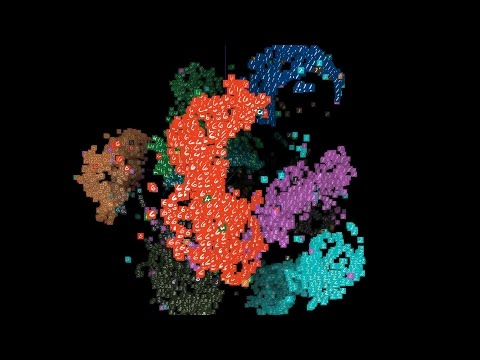

In [ ]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('wvsE8jm1GzE')

In these kind of scenerios, DNN does a very good job at it's performance but this comes with the cost of more hardware requirement to be able to train the model and more training time.

##Backpropogation in DNN
The below video gives a necessary information on how it takes place

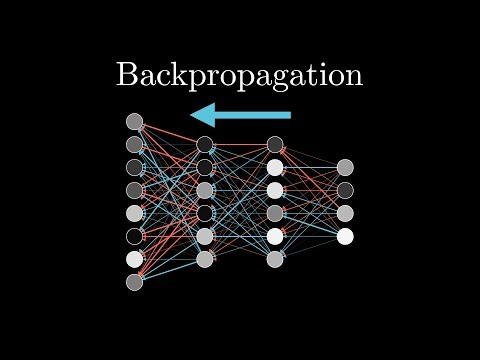

In [ ]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('Ilg3gGewQ5U')

#Optimizers

* ### Gradient Descent:<br>
Gradient Descent is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.
Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function. It calculates that which way the weights should be altered so that the function can reach a minima. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

* ### Stochastic Gradient Descent:<br>
 It’s a variant of Gradient Descent. It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of onetime as in Gradient Descent.

*  ### Mini-Batch Gradient Descent:<br>
 It’s best among all the variations of gradient descent algorithms. It is improvement on both SGD and standard gradient descent. It updates the model parameters after every batch. So the dataset is divided into various batches and after every batch, the parameters are updated. So one step is taken by Gradient Descent when one batch gets computed. THis is usally done for very large Datasets, for small ones like ~2k you can use Gradient Descent.

* ### Gradient Descent with Momentum:<bR>
 Almost always, gradient descent with momentum converges faster than the standard gradient descent algorithm. In the standard gradient descent algorithm, you would be taking larger steps in one direction and smaller steps in another direction which slows down the algorithm. In the image shown below, you can see that standard gradient descent takes larger steps in the y- direction and smaller steps in the x-direction. If our algorithm is able to reduce the steps taken in the y-direction and concentrate the direction of the step in the x-direction, our algorithm would converge faster. This is what momentum does, it restricts the oscillation in one direction so that our algorithm can converge faster. Also, since the number of steps taken in the y-direction is restricted, we can set a higher learning rate.

*  ### RMSprop :<br>
RMSProp also tries to dampen the oscillations, but in a different way than momentum. RMS prop also takes away the need to adjust learning rate, and does it automatically. More so, RMSProp choses a different learning rate for each parameter.Since we do it separately for each parameter, gradient Gt here corresponds to the projection, or component of the gradient along the direction represented by the parameter we are updating.

* ### Adam :<br>
Adam or Adaptive Moment Optimization algorithms combines the heuristics of both Momentum and RMSProp.To decide our learning step, we multiply our learning rate by average of the gradient (as was the case with momentum) and divide it by the root mean square of the exponential average of square of gradients (as was the case with momentum).Then, we add the update.
<br>
<br>
Quick Suggestion:<br>
Adam is one of the preferred optimizers, as it usaualyy helps converges faster.
For small dataset gradient descent algorithm is preferred whereas for large dataset min-batch gradient descent is usually used.

The required optimizer is defined in the *compile* method as one of it's argument *optimizer*. It can directly be passed as a 'string'.

In the above example we are passing *adam* as our optimizer.
You can pass other optimizer also, for that you can refer the documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

Let's see how we code it!



In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')

## Comparing different optimizers
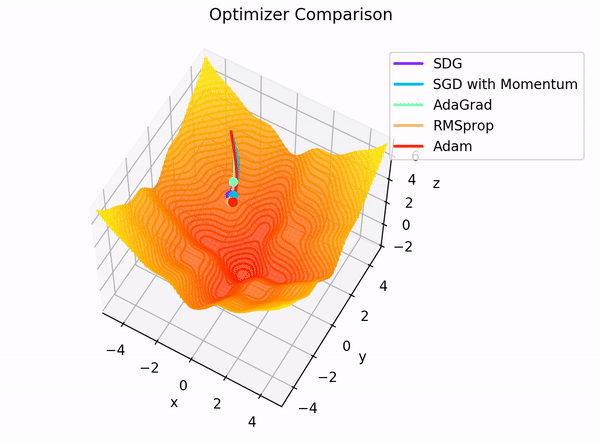<br>
<br>
Source : https://towardsdatascience.com/complete-guide-to-adam-optimization-1e5f29532c3d

##Regularization

The main reason of overfitting is model complexity. Thus, we can prevent a model from overfitting by controlling the complexity which is exatly what regularization does. Regularization controls the model complexity by penalizing higher terms in the model. If a regularization terms is added, the model tries to minimize both loss and complexity of model.<br>

Mainly 2 techniques are usesd to overcome this:
1. L1/l2 Regularization
2. Droppout

#### L1/L2 Regularization

The two main reasons that cause a model to be complex are:<bR>
Total number of features (handled by L1 regularization)<br>
The weights of features (handled by L2 regularization)

* L1 Regularization<br>
It is also called regularization for sparsity. As the name suggests, it is used to handle sparse vectors which consist of mostly zeroes. Sparse vectors typically result in very high-dimensional feature vector space. Thus, the model becomes very difficult to handle.
L1 regularization forces the weights of uninformative features to be zero by substracting a small amount from the weight at each iteration and thus making the weight zero, eventually.

* L2 Regularization<br>
L2 regularization forces weights toward zero but it does not make them exactly zero. L2 regularization acts like a force that removes a small percentage of weights at each iteration. Therefore, weights will never be equal to zero.There is an additional parameter to tune the L2 regularization term which is called regularization rate (lambda). Regularization rate is a scalar and multiplied by L2 regularization term.

Note that both regularization terms are added as extra term to the default loss function.

i.e Goal is to minimize (lossfunction+Regurlarization Term(L1/L2)



##Let us take a look at the code now


In [ ]:
# For L1 Regularizatiom
tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1(0.001))

# For L2 Regularizatiom
tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001))

Regularizer is passed as one of the arguments in the *Dense* layer as **kernel_regularizer**, as described above looking at your requirement you can use L1/L2 R.

For defining the regularizers call l1/l2 from the *regularizers* module the arguement for the both defines the penalty.

##Dropout

dropout refers to ignoring neurons during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not used in backpropogation and forward step as well.

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

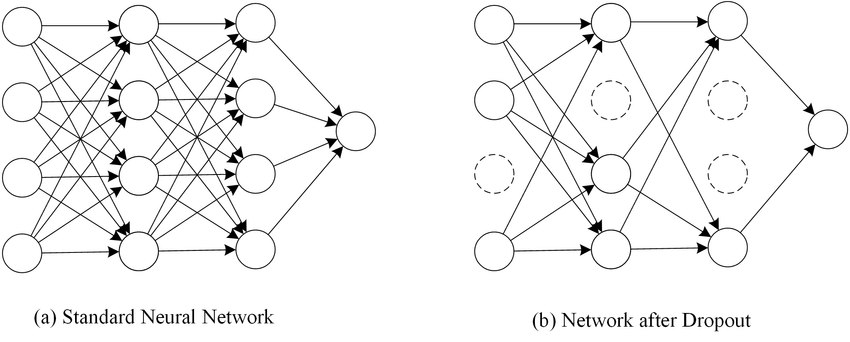<br>Source : https://pranav-ap.netlify.app/posts/regularization/

In [ ]:
tf.keras.layers.Dropout(0.3)

Call *Dropout* from *layers* module and the argument is a number between 0 to 1, representing the probability of number of neurons which will be shut off in that particular layer.

#Parameters vs Hyperparameters

I often see people getting confused between *Parameters*  and *Hyperparameters*, let us clear all doubts regarding this!

*  *Parameters*:<br>
By now you are well familiar with the *weights* and *bias* they are called the *Parameters* of the model. On a general note any variable which is learnt in the training phase are considered as *Parameters*.

*  *Hyperparameters*:<br>
On contrast to *Parameters*, *Hyperparameters* are the variable which are fixed before training phase. Very common *Hyperparameters* in a MLP are : No of layers; No of neurons in a layer; Which activation function to choose; Which optimizer to use etc, you got the idea by now.


Note that the effect of *Parameters* on the model performance is controlled by setting up suitable *Hyperparameters*. There is no ***right*** set of *HYperparameters* which will give you the best *Parameters* for your model leading to its best performance, instead you have to play around and figure out what works best for you. <br>
For starting point you can refer to research papers and see what *Hyperparameters* have they used and use hit and trial method around that.<br>
You can also make use of [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.58922&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to see how each can affect your model. Go play with it and have fun! 

##Batch Normalization

The purpose of the Batch Normalization is to make sure that your model dosen't stop learning in the whole trainig phase due to you weights value becoming really high. 


This happens when you have a very deep architecture of your network, there is a very  high chance the value of the Parameters can become really high, since a deep Neural Network at it's core is a lot of Matrix Multiplication, so the Parameters can blow up to huge values. If this happens the model will stop learning.

So to overcome this problem what Batch Normalization does is, as it's name suggest it normalizes the data around the origin, preventing Parameters from blowing up!

Now let's how does it exactly happen!




As you have seen before $z$ is computed in the below manner<br>
$ z = w.x + b$<br>
$ zn = \frac{z - \mu}{\sqrt[]{\sigma^2 + \epsilon}}  $<br>
$ zn = \gamma * zn + \beta  $

Here:<br>
$\mu$ = Standard Deviation<br>
$\sigma^2$ = Variance<br>
Note that the $\gamma$ nad $\beta$ are *Learnable Parameters* and are learnt in the training phase.


###Let's look at tenforflow syntax now:<br>



In [ ]:
tf.keras.layers.BatchNormalization(axis=0, epsilon=0.001),

(<tensorflow.python.keras.layers.normalization_v2.BatchNormalization at 0x7fe5e5eb7b50>,)

axis    : decides along which dimention to normalize i.e along row/column.<br>
epsilon : the value you want to set for the $\epsilon$ u can see in the denominator of the second equation

There are other arguemnets to this, you cana take a look at the documentation of TensorFlow a if interested.<br>

Input shape : No constraint to its shape, can pass the prevoius layer tensor without any modifications.<br>
Output shape : Same as the Input shape of the Tensor.